# Passenger Time Series Prediction


# Method: Holt-Winters
Hol-Winters Exponential Smoothening can smoothen the values of a Univariate Time Series Analysis to use them for forecasting future values by assigning exponentially decreasing weights giving more importance to more recent incidents.

### Key Terms

    Levels: significant increment in values that occurs a period of time
    Trends: linear, square, logarithmic, exponential. 
            Additive: add the same number to any x-value to get the corresponding y-value
            Multiplicative: multiply SAME number by any x-value to get the corresponding y-value
    Seasonality: Time Series with certain patterns are periodically repeated.
    Stationarity: mean and variance constant over time

### Function

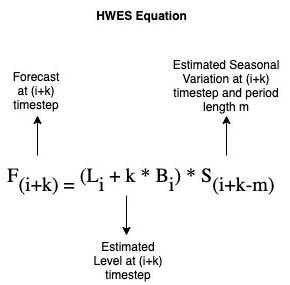


### How it works?

$\alpha$ , $\beta$, $\gamma$ for single, double and triple exponential smoothing. These weights coefficients has initial weights before achieve optimization. When $\alpha$ , $\beta$, $\gamma$ have setted optimization, we can use these to calculate $F\_(i+k)$

Single HWES($\alpha$) handle levels

Double HWES($\alpha$ , $\beta$) handle trends

Triple HWES($\alpha$ , $\beta$, $\gamma$) handle Seasonality

    
### When to use Holt-Winters(Assumption)?
    Holt-Winter is used for exponential smoothing to make short-term forecasts. So, when we know the relationship is exponential and when we need to predict short-term forecasts.

### Why Holt-Winters(advantage)?
    It gives more significance to recent observations.

### Why not Holt-Winters(disadvantage)?
    It produces forecasts that lag behind the actual trend.
    forecasts aren’t accurate when data with cyclical or seasonal variations are present.
    


### Reference
https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873

https://www.kaggle.com/chirag19/air-passengers


-------------------
-------------------


# Data

    Month: Month of the year
    Passengers: Total number of passengers travelled on that particular month

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [3]:
data = pd.read_csv('AirPassengers.csv',index_col='Month', parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
data.isna().sum()

Passengers    0
dtype: int64

Train Test Split

In [6]:
data_train = data.iloc[:115,:]
data_test = data.iloc[115:,:]
data_train

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1958-03-01,362
1958-04-01,348
1958-05-01,363


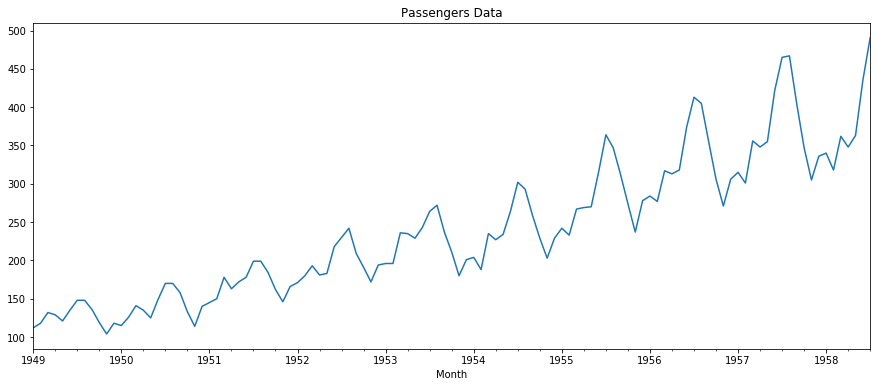

In [7]:
plt.plot(dpi = 100)
data_train['Passengers'].plot(title='Passengers Data', figsize = (15,6))
plt.show()

# Decomposing
Decomposing the Time Series to look at Levels, Trends and Seasonality

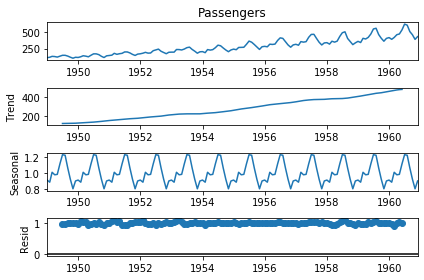

In [8]:
decompose_result = seasonal_decompose(data['Passengers'],model='multiplicative')
decompose_result.plot();

According to the chart, we can see trend and seasonality. The data shows that the passengers increases every year. Usually it reaches the peak at the middle of the year then with some decrease closed to the end of the year. The trend shows that it keep increasing from 1950 - 1960. We can see the seasonal has the same periodic pattern every year.

# Modeling

C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\82124\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\82124\Anacon

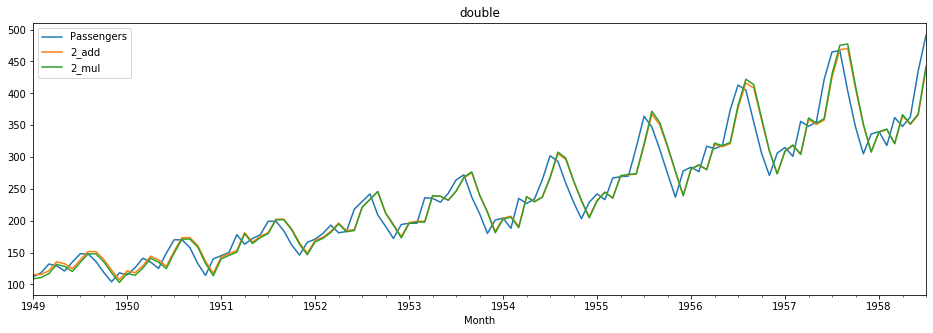

In [9]:
data_train['2_add'] = ExponentialSmoothing(data_train.Passengers, trend = 'add').fit().fittedvalues
data_train['2_mul'] = ExponentialSmoothing(data_train.Passengers, trend = 'mul').fit().fittedvalues
data_train[['Passengers','2_add','2_mul']].plot(title='double',figsize = (16,5))
plt.show()

The result is good. Additive and multiplicative have similar results. Lets see if we have seasonality. We can see that the seasonality is a year. Since our data use month, we can use 12 months.

C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\82124\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\82124\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 


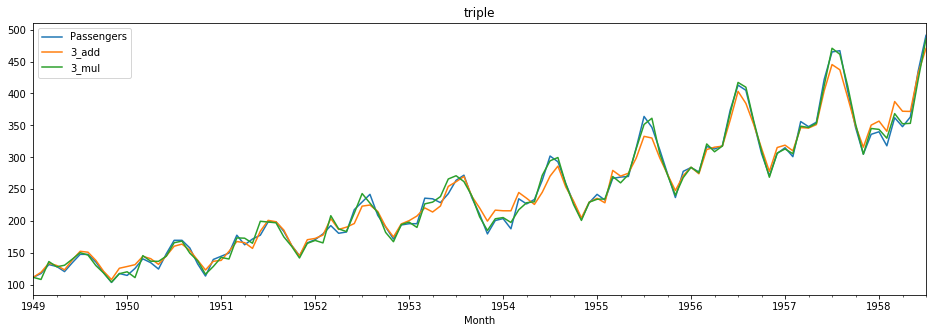

In [10]:
data_train['3_add'] = ExponentialSmoothing(data_train.Passengers, trend = 'add', 
                                           seasonal='add',seasonal_periods=12).fit().fittedvalues
data_train['3_mul'] = ExponentialSmoothing(data_train.Passengers, trend = 'mul', 
                                           seasonal='mul',seasonal_periods=12).fit().fittedvalues
data_train[['Passengers','3_add','3_mul']].plot(title='triple',figsize = (16,5))
plt.show()

The result looks better. 


# Forecasting
## Holt-Winters
We are ready to use these model to forecast. We use Mean absolute percentage error as the measure metric. 
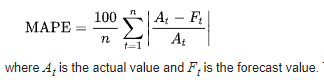

In [11]:
model_2add = ExponentialSmoothing(data_train.Passengers, trend = 'add').fit()
model_2mul = ExponentialSmoothing(data_train.Passengers, trend = 'mul').fit()
model_3add = ExponentialSmoothing(data_train.Passengers, trend = 'add', seasonal='add',seasonal_periods=12).fit()
model_3mul = ExponentialSmoothing(data_train.Passengers, trend = 'mul', seasonal='mul',seasonal_periods=12).fit()

C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


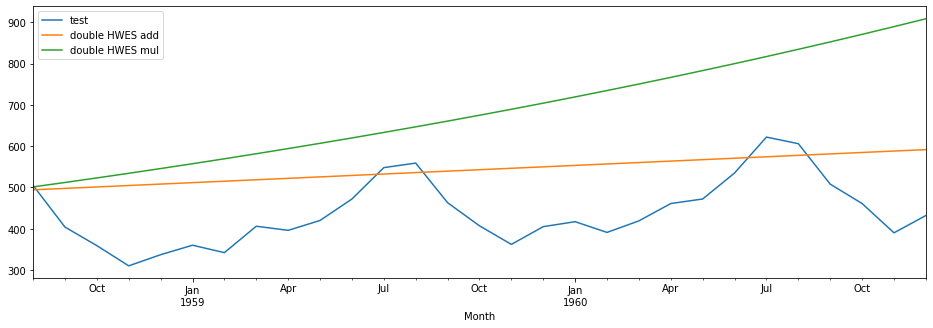

In [12]:
prediction_2add = model_2add.forecast(29)
prediction_2mul = model_2mul.forecast(29)
data_test['Passengers'].plot(label='test',legend=True,figsize = (16,5))
prediction_2add.plot(label='double HWES add',legend=True)
prediction_2mul.plot(label='double HWES mul',legend=True)

C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


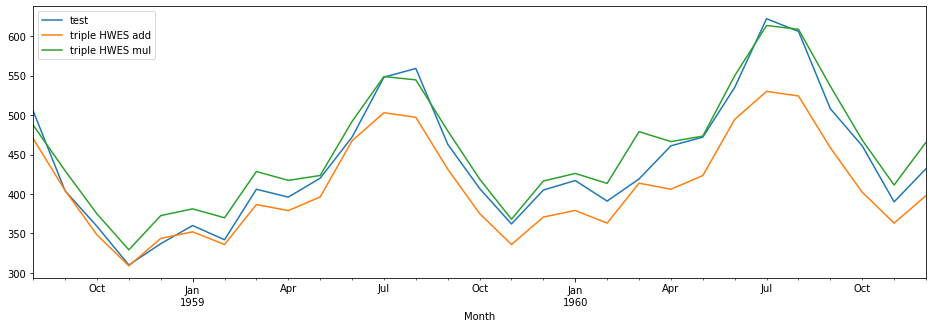

In [13]:
prediction_3add = model_3add.forecast(29)
prediction_3mul = model_3mul.forecast(29)
data_test['Passengers'].plot(label='test',legend=True,figsize = (16,5))
prediction_3add.plot(label='triple HWES add',legend=True)
prediction_3mul.plot(label='triple HWES mul',legend=True)

In [14]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [15]:
print(f'Mean Absolute Percentage Error = {mean_absolute_percentage_error(data_test,prediction_3add)}')

Mean Absolute Percentage Error = 6.708104785121159


In [16]:
print(f'Mean Absolute Percentage Error = {mean_absolute_percentage_error(data_test,prediction_3mul)}')

Mean Absolute Percentage Error = 4.256471697026287


The triple HWES looks better. The mean absolute percentage error is smaller. Let's see if given the date, what will happen in the prediction.

In [17]:
prediction_3mul

1958-08-01    487.178965
1958-09-01    429.482022
1958-10-01    374.823468
1958-11-01    329.243205
1958-12-01    372.590624
1959-01-01    381.142393
1959-02-01    369.845946
1959-03-01    428.494542
1959-04-01    417.234991
1959-05-01    423.434948
1959-06-01    491.893885
1959-07-01    548.806345
1959-08-01    544.535453
1959-09-01    480.045741
1959-10-01    418.952134
1959-11-01    368.005621
1959-12-01    416.456413
1960-01-01    426.014998
1960-02-01    413.388599
1960-03-01    478.942004
1960-04-01    466.356844
1960-05-01    473.286733
1960-06-01    549.805469
1960-07-01    613.418339
1960-08-01    608.644627
1960-09-01    536.562421
1960-10-01    468.276149
1960-11-01    411.331609
1960-12-01    465.486603
Freq: MS, dtype: float64

In [18]:
data_test['prediction'] = round(prediction_3mul,0)

C:\Users\82124\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Seasonal ARIMA model
The period for seasonal differencing, m refers to the number of periods in each season. For example, m is 4 for quarterly data, 12 for monthly data, or 1 for annual (non-seasonal) data. Default is 1. Note that if m = 1 (i.e., is non-seasonal)

In [19]:
model = pm.auto_arima(data_train['Passengers'], start_p=1, start_q=1, test='adf', max_p=10, max_q=10, m=12, d=None,seasonal=True,   
                      start_P=0, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=756.629, Time=0.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=755.750, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=756.380, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=755.499, Time=0.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=755.982, Time=0.09 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=757.649, Time=0.15 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=756.771, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=756.022, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=756.011, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=757.976, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=757.438, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 0.975 seconds
                                     SARIMAX Results                                   

The best model SARIMAX(1, 1, 0)x(0, 1, 0, 12) has an AIC of 755 and the P Values are significant.

In [20]:
model = SARIMAX(data_train['Passengers'],order=(1, 1, 0), seasonal_order=(0, 1, 0, 12),
              enforce_stationarity=False, enforce_invertibility=False)
result = model.fit()

C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\82124\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -372.414
Date:                            Fri, 08 Oct 2021   AIC                            748.828
Time:                                    00:11:48   BIC                            754.058
Sample:                                01-01-1949   HQIC                           750.946
                                     - 07-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2063      0.091     -2.271      0.023      -0.384      -0.028
sigma2        93.3784     13.542      6.895      0.000      66.836     119.921
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.87   Prob(JB):                         0.27
Heteroskedasticity (H):               0.97   Skew:                             0.39
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
forecast = result.predict(start = len(data_train),end=len(data_train)+29,
                           typ='levels').rename('data sarimax (1,0,1) forecast')

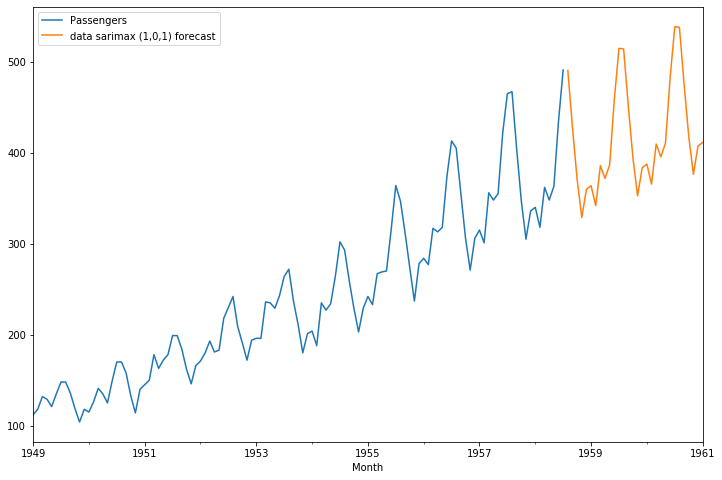

In [23]:
data_train['Passengers'].plot(figsize=(12,8),legend=True)
#plt.plot(data_test['Passengers'], label='actual')
forecast.plot(legend=True)